In [93]:
import math
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from bs4 import BeautifulSoup

def update_data(xls, csv):
    df = pd.read_csv(csv, index_col= ['Date'], parse_dates=True)
    html = BeautifulSoup(open(xls, encoding='utf8'), "lxml")
    items = []

    for tr in html.find_all("tr")[1:]:
        children = list(tr.children)
        d = dt.datetime.strptime(children[2].string, "%Y/%m/%d %H:%M:%S")
        if d > df.index[-1]:
            dict = {'Code': children[0].string, 
                'Name': children[1].string,
                'Date': d,
                'Close': children[3].string,
                'Volumn': children[4].string,
                'Change': children[5].string,
                'Turnover': children[6].string,
                'PE': children[7].string,
                'PB': children[8].string,
                'Average': children[9].string,
                'AmountPercentage': children[10].string,
                'HQLTSZ': children[11].string.replace(',', ''),
                'AHQLTSZ': children[12].string.replace(',', ''),
                'Payout': children[13].string}
            # Code,Name,Date,Open,High,Low,Close,Volumn,Amount,Change,Turnover,PE,PB,Average,AmountPercentage,HQLTSZ,AHQLTSZ,Payout
            item_str = '{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}'.format(
                        dict["Code"], dict["Name"], dict["Date"].strftime("%m/%d/%Y"), '', '', '',
                        dict["Close"], dict["Volumn"], '', 
                        dict["Change"], dict["Turnover"], dict["PE"], dict["PB"],
                        dict["Average"], dict["AmountPercentage"], 
                        dict["HQLTSZ"], dict["AHQLTSZ"], dict["Payout"])
            items.append(item_str)

    with open(csv, 'a', encoding="utf-8") as file:
        for i in reversed(items):    
            file.write(i + "\n")

update_data(r'C:/Users/nn1003/Downloads/801811.xls', r'C:/Users/nn1003/Documents/Invest/RInvest/sw/801811.csv')
update_data(r'C:/Users/nn1003/Downloads/801813.xls', r'C:/Users/nn1003/Documents/Invest/RInvest/sw/801813.csv')

In [94]:
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 9999) 
pd.set_option('precision', 3)

df_xp = pd.read_csv(r'C:/Users/nn1003/Documents/Invest/RInvest/sw/801813.csv', 
                  index_col= ['Date'], parse_dates=True)

df_jy = pd.read_csv(r'C:/Users/nn1003/Documents/Invest/RInvest/sw/801811.csv', 
                  index_col= ['Date'], parse_dates=True)

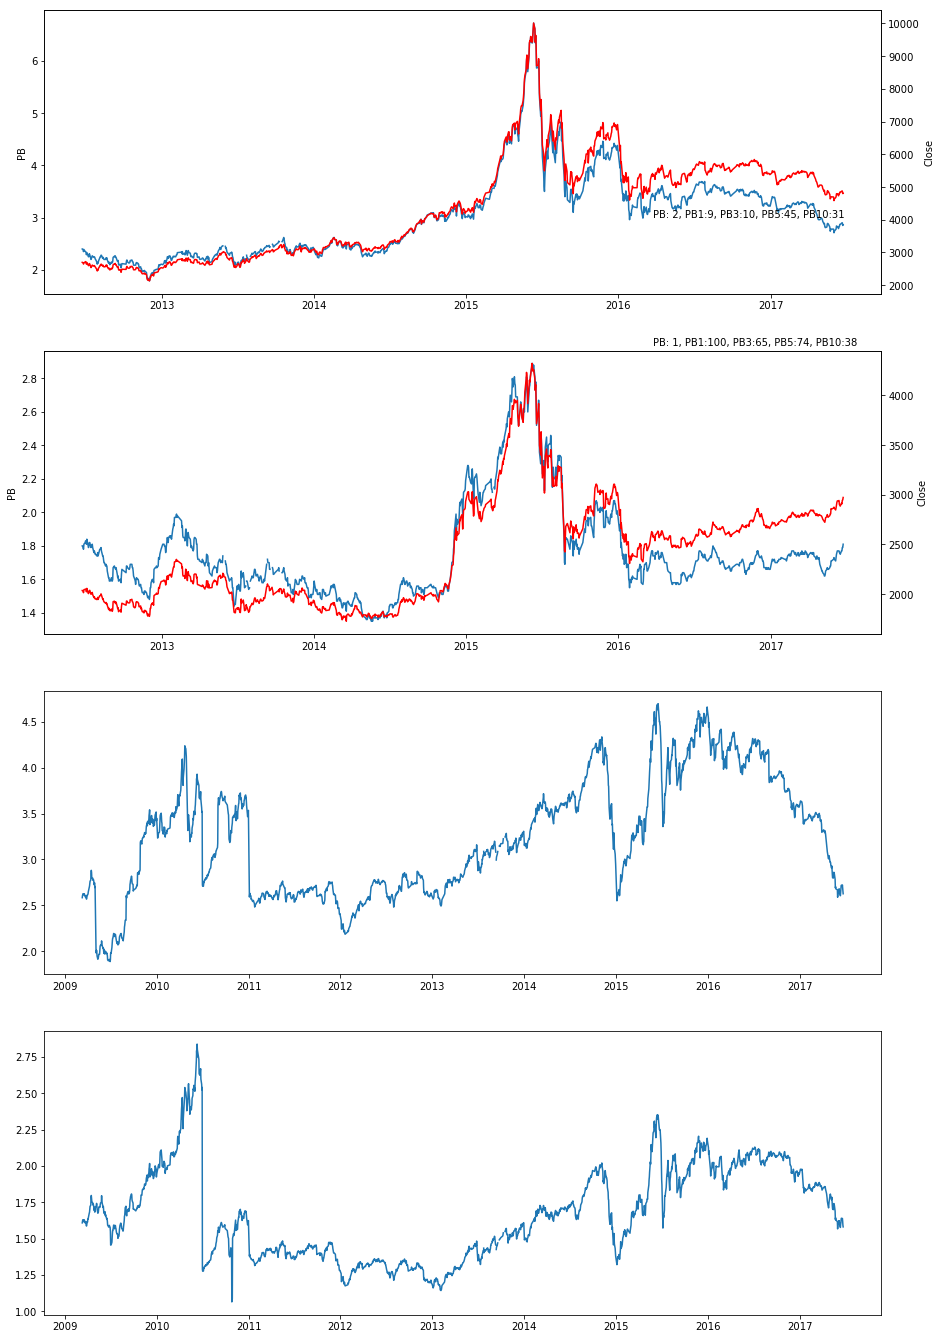

In [95]:
fig, axes = plt.subplots(4, 1, figsize=(15, 24))

ax1 = axes[0]
ax1.plot(df_xp['PB'][-1200:])
ax1.set_ylabel('PB')
ax2 = ax1.twinx()
ax2.plot(df_xp['Close'][-1200:], 'r')
ax2.set_ylabel('Close')

last_PB = df_xp['PB'][-1]

ax1.text(df_xp.index[-300], 3,
         'PB: {}, PB1:{}, PB3:{}, PB5:{}, PB10:{}'.format(
             int(last_PB),
             int(stats.percentileofscore(df_xp['PB'][-240:], last_PB)),
             int(stats.percentileofscore(df_xp['PB'][-720:], last_PB)),
             int(stats.percentileofscore(df_xp['PB'][-1200:], last_PB)),
             int(stats.percentileofscore(df_xp['PB'][-2400:], last_PB))))


ax2 = axes[1]
ax2.plot(df_jy['PB'][-1200:])
ax2.set_ylabel('PB')
ax3 = ax2.twinx()
ax3.plot(df_jy['Close'][-1200:], 'r')
ax3.set_ylabel('Close')

last_PB = df_jy['PB'][-1]
ax2.text(df_jy.index[-300], 3,
         'PB: {}, PB1:{}, PB3:{}, PB5:{}, PB10:{}'.format(
             int(last_PB),
             int(stats.percentileofscore(df_jy['PB'][-240:], last_PB)),
             int(stats.percentileofscore(df_jy['PB'][-720:], last_PB)),
             int(stats.percentileofscore(df_jy['PB'][-1200:], last_PB)),
             int(stats.percentileofscore(df_jy['PB'][-2400:], last_PB))))

ax3 = axes[2]
ax3.plot(df_xp['PE'][-2000:] / df_jy['PE'][-2000:] )

ax4 = axes[3]
ax4.plot(df_xp['PB'][-2000:] / df_jy['PB'][-2000:] )
 
plt.show()


In [96]:
(df_xp['PE'][-1200:] / df_jy['PE'][-1200:]).min(), df_xp['PE'][-20:] / df_jy['PE'][-20:]

(2.4805077062556666, Date
 2017-05-25    2.681
 2017-05-26    2.677
 2017-05-31    2.670
 2017-06-01    2.588
 2017-06-02    2.623
 2017-06-05    2.664
 2017-06-06    2.657
 2017-06-07    2.680
 2017-06-08    2.645
 2017-06-09    2.640
 2017-06-12    2.605
 2017-06-13    2.638
 2017-06-14    2.678
 2017-06-15    2.713
 2017-06-16    2.720
 2017-06-19    2.708
 2017-06-20    2.722
 2017-06-21    2.691
 2017-06-22    2.646
 2017-06-23    2.626
 Name: PE, dtype: float64)

In [100]:
(df_xp['PB'][-1200:] / df_jy['PB'][-1200:]).min(), df_xp['PB'][-20:] / df_jy['PB'][-20:]

(1.1421319796954315, Date
 2017-05-25    1.626
 2017-05-26    1.626
 2017-05-31    1.616
 2017-06-01    1.566
 2017-06-02    1.593
 2017-06-05    1.620
 2017-06-06    1.607
 2017-06-07    1.623
 2017-06-08    1.608
 2017-06-09    1.599
 2017-06-12    1.576
 2017-06-13    1.599
 2017-06-14    1.608
 2017-06-15    1.631
 2017-06-16    1.640
 2017-06-19    1.633
 2017-06-20    1.638
 2017-06-21    1.620
 2017-06-22    1.592
 2017-06-23    1.580
 Name: PB, dtype: float64)

In [98]:
df_jy['PB'][-100:]

Date
2017-01-19    1.71
2017-01-20    1.72
2017-01-23    1.72
2017-01-24    1.72
2017-01-25    1.73
2017-01-26    1.73
2017-02-03    1.72
2017-02-06    1.72
2017-02-07    1.71
2017-02-08    1.72
2017-02-09    1.73
2017-02-10    1.74
2017-02-13    1.75
2017-02-14    1.75
2017-02-15    1.74
2017-02-16    1.75
2017-02-17    1.74
2017-02-20    1.77
2017-02-21    1.77
2017-02-22    1.77
2017-02-23    1.77
2017-02-24    1.77
2017-02-27    1.75
2017-02-28    1.76
2017-03-01    1.76
2017-03-02    1.75
2017-03-03    1.74
2017-03-06    1.75
2017-03-07    1.76
2017-03-08    1.75
2017-03-09    1.74
2017-03-10    1.74
2017-03-13    1.76
2017-03-14    1.75
2017-03-15    1.76
2017-03-16    1.77
2017-03-17    1.75
2017-03-20    1.75
2017-03-21    1.76
2017-03-22    1.75
2017-03-23    1.75
2017-03-24    1.77
2017-03-27    1.76
2017-03-28    1.75
2017-03-29    1.75
2017-03-30    1.73
2017-03-31    1.74
2017-04-06    1.76
2017-04-07    1.76
2017-04-10    1.75
2017-04-11    1.76
2017-04-12    1.75
2017-04